Assumptions in Multilinear Regression
1. Linearity: The relationship between the predicators and the response is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals (Y - Y_hat)) exhibits constant variance at all levels of the predictors.
4. Normal Distribution of 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [37]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [39]:
cars = pd.DataFrame(cars, columns=["Hp","VOl","WT","MPG"])
cars.head()

,Hp,VOl,WT,MPG
0,NaN,NaN,28.762059,53.700681
1,NaN,NaN,30.466833,50.013401
2,NaN,NaN,30.193597,50.013401
3,NaN,NaN,30.632114,45.696322
4,NaN,NaN,29.889149,50.504232


Description of colomns
- MPG: Milege of the car(Mile per Gallon) (This is Y-column to be predicated)
- HP: Horse Power of the car(X1 column)
- VOL: Volume of the car(size) (X2 column)
- SP: Top speed of the car (Miles per Hour)(x3 column)
- WT: Weight of the car(Pounds)(X4 Column)

In [44]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hp      0 non-null      float64
 1   VOl     0 non-null      float64
 2   WT      81 non-null     float64
 3   MPG     81 non-null     float64
dtypes: float64(4)
memory usage: 2.7 KB


In [50]:
cars.isna().sum

<bound method DataFrame.sum of       Hp   VOl     WT    MPG
0   True  True  False  False
1   True  True  False  False
2   True  True  False  False
3   True  True  False  False
4   True  True  False  False
..   ...   ...    ...    ...
76  True  True  False  False
77  True  True  False  False
78  True  True  False  False
79  True  True  False  False
80  True  True  False  False

[81 rows x 4 columns]>

### Observations
- There are no missinf valuse
- There are 81 observations (81 different cars data)
- the data type of the columns are also relevant and valid

ValueError: Could not interpret value `HP` for `x`. An entry with this name does not appear in `data`.

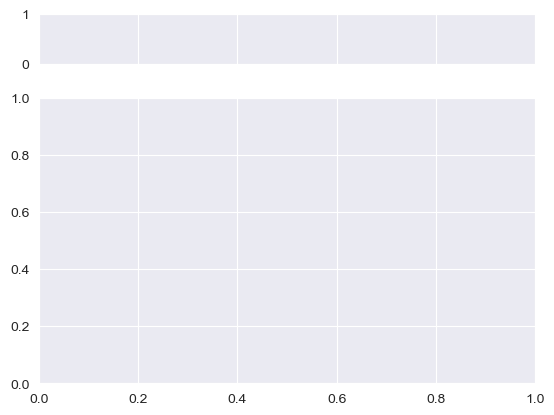

In [72]:
fig,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=cars,x='HP', ax=ax_box,orient='h')
ax_box.set(xlabel=" ")
sns.hisplot(data=cars, y='HP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

## Observation from boxplot and histograms

- There are some extreme values (outliers) observed in towards the right tail to SP and HP distributions.
- in VOL and WT columns, a few outliers are observed in both tails of their distribution
- The extreme values of cars data may have from the specially designed nature of cars
- As this is multi-dimensional data, the outliers with respect to spatial dimenstion may have to be considered while building the regression mode


### Checking for duplicated rows

In [16]:
cars[cars.duplicated()]


,Hp,VOl,WT,MPG


### pair plots and correlation coefficents

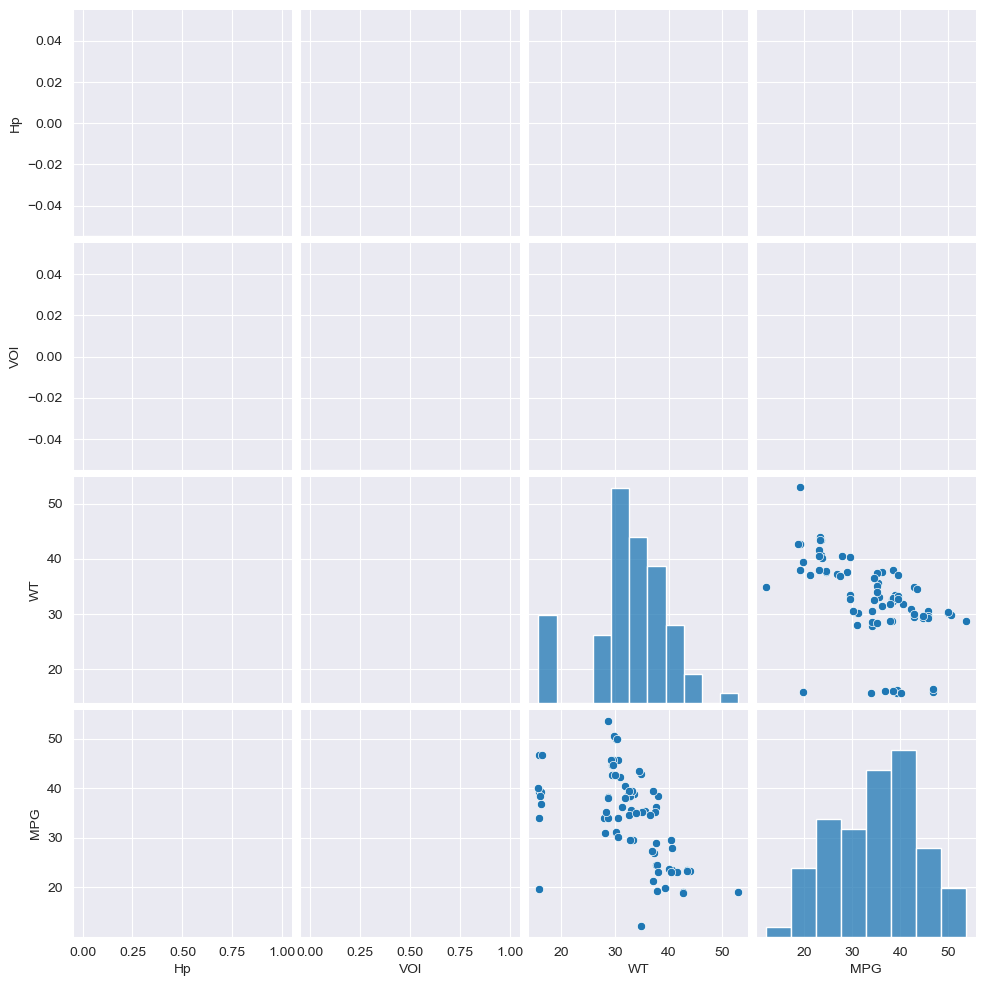

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [20]:
cars.corr()

,Hp,VOl,WT,MPG
Hp,NaN,NaN,NaN,NaN
VOl,NaN,NaN,NaN,NaN
WT,NaN,NaN,1.000000,-0.526759
MPG,NaN,NaN,-0.526759,1.000000


## Observations from correlation plots and coefficients

- Between x and y, all the x variables are showing moderate to high correlation strength, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3,and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT
- The high correlation among x columns is not desirable as it ,might lead to multicollinearity problem

#### Preparing a preliminary model considering all X columns

In [64]:

model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

PatsyError: Error evaluating factor: NameError: name 'VOL' is not defined
    MPG~WT+VOL+SP+HP
           ^^^

In [66]:
model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

PatsyError: Error evaluating factor: NameError: name 'VOL' is not defined
    MPG~WT+VOL+SP+HP
           ^^^

In [61]:
model.summary()

NameError: name 'model' is not defined

### Observations from model summary

- The-squared and adjusted R-squared values are good and about 75% of variability in Y is explained by X columns
- The probability value with respect to F- statistic is close to zero, indicating that all or someof X columns are significant
- The p-values for VOL and WT are higher than 5% indicating issue among themselves, which need to be further explored 

Performance metrics for model1

In [57]:
df1 = pd.DataFrame()
df1['actual_y1'] = cars['MPG']
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [ ]:
pred_y1 = model.predict(cars.iloc[:,0:4])
df1['Pred_y1'] = pred_y1
df1.head()

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(df1["actual"],df1['pred_y1']))